In [1]:
import random as rd 
import os
import re
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import colors
import scipy
from scipy import signal
import statsmodels
from statsmodels import stats
from statsmodels.stats import stattools
import simulations
import stability_diagrams as sd

P_EQ [0.5]
G_EQ [2.]
0.051077 [0.4]


<IPython.core.display.Javascript object>


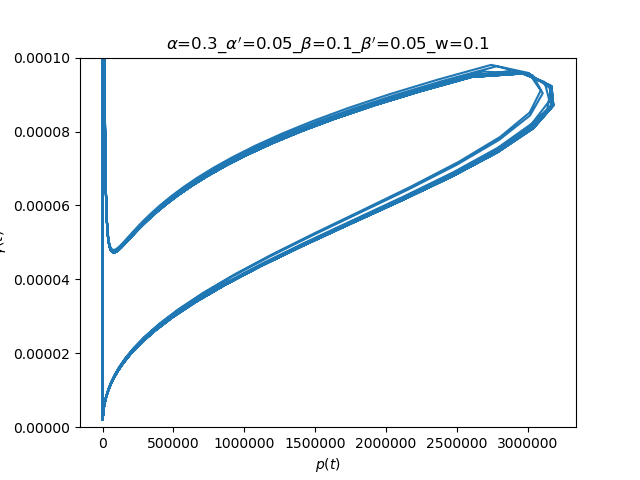

In [55]:
%matplotlib notebook
# Many "phase diagrams": 2D

#values_alpha=[0.3]
#values_alpha_p = [0.05]
#values_beta = [0.1, 0.6, 0.8]
#values_beta_p = [0.05]
#values_w = [0.1, 0.3]



for p_init in values_p:
    for g_init in values_g:
        sim_args = simulations.variables_simulation(alpha, alpha_p, beta, beta_p, w, q, b, p_init, g_init, pert)
        sim = simulations.simulation(**sim_args)
        p_eq_0,g_eq_0=simulations.compute_equilibrium(sim)
        prod = [sim.eco.production_function(sim.Q_real[i, :, 1]) for i in range(len(sim.Q_real))]
        print(p_init, g_init)
        fig = plt.figure()
        ax = plt.axes()
        ax.set_xlabel(r"$p(t)$")
        ax.set_ylabel(r"$\gamma (t)$")
        ax.set_ylim(0, 0.0001)
        scenario=r"$\alpha$="+str(alpha)+r"_$\alpha'$="+str(alpha_p)+r"_$\beta$="+str(beta)+r"_$\beta'$="+str(beta_p)+"_w="+str(w)
        ax.set_title(scenario)

        ax.plot(sim.prices[1:-1],prod[1:-1])
        plt.show()

<IPython.core.display.Javascript object>


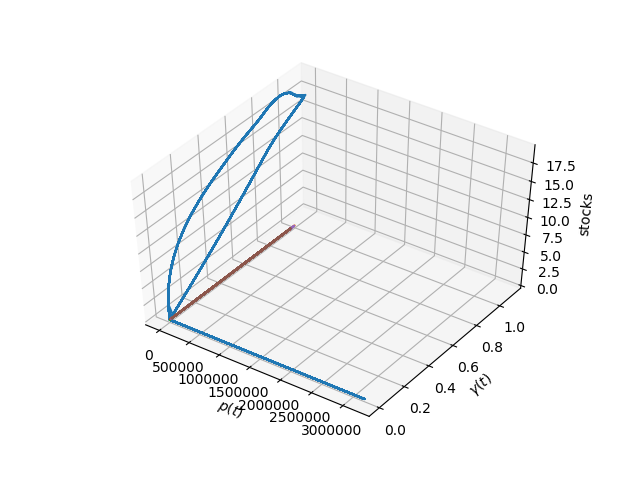

In [33]:
%matplotlib notebook
from mpl_toolkits import mplot3d
# Many "phase diagrams": 3D
alpha=0.3
alpha_p=0.05
w=0.1

beta=0.1
beta_p=0.05

b=1.0
q=0.0
pert = 0

values_p=[0.051077]
values_g=[np.array([0.4])]

stocks=[sim.stocks[i][0] for i in range(len(sim.stocks))]
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.set_xlabel(r"$p(t)$")
ax.set_ylabel(r"$\gamma (t)$")
ax.set_zlabel(r"stocks")
ax.plot3D(sim.prices[1:-1],prod[1:-1],stocks[1:-1])

plt.show()

In [32]:
stocks

[0.0,
 0.0,
 2.191816750068541,
 1.9017777653933448,
 1.5343044932076033,
 1.2290835257311132,
 0.9835691891282465,
 0.7869355544612965,
 0.6295787021087157,
 0.5036788861142062,
 0.40295454124374275,
 0.32237688018216437,
 0.25791684471884746,
 0.206351229193799,
 0.16510151507649148,
 0.13210493995311562,
 0.10571135366970819,
 0.08460070435488079,
 0.06771702853835447,
 0.05421564477433613,
 0.043420910330379564,
 0.034792428621632975,
 0.027898017564511508,
 0.022392087017942597,
 0.017998343873316447,
 0.014495959663102834,
 0.011708508591823435,
 0.009495122289362237,
 0.007743418236061776,
 0.006363847186378488,
 0.0052851753343418195,
 0.004450872757489052,
 0.0038162233724672043,
 0.0033460051724309168,
 0.00301261471007749,
 0.0027945292569082508,
 0.002675018376033519,
 0.0026410401490529673,
 0.0026822900287208915,
 0.0027904066490679943,
 0.002958363502173621,
 0.0031800831587615475,
 0.0034503511337133073,
 0.0037654294232949653,
 0.00412033430107244,
 0.00450986378769596

<IPython.core.display.Javascript object>


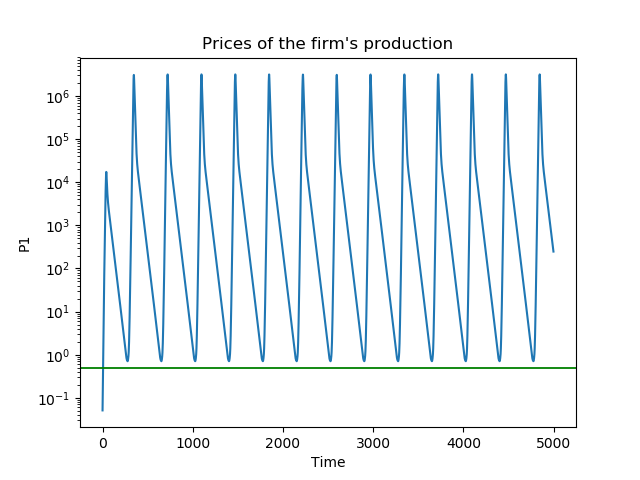

In [6]:
### Prices
%matplotlib notebook
fig, ax = plt.subplots()
ax.set_title("Prices of the firm's production")
ax.set_xlabel('Time')
ax.set_ylabel('P1')

ax.plot(sim.prices[1:-1])

plt.axhline(y=p_eq_0,linewidth=1.3, alpha=1, color="green", label="p=p_eq")
#plt.axhline(y=p_eq_1,linewidth=1.3, alpha=1, color="red", label="p=p_eq")
#plt.xscale("linear")
#plt.axhline(y=1.5, linewidth=1.3, alpha=1, color="red", label="p=p_eq")
ax.set_yscale("log")

#plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


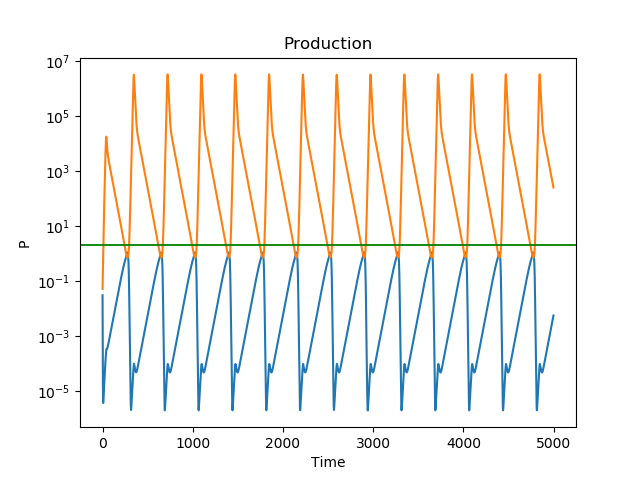

In [8]:
%matplotlib notebook
### Production
fig, ax = plt.subplots()
ax.set_title("Production")
ax.set_xlabel('Time')
ax.set_ylabel("P")

prod=[sim.eco.production_function(sim.Q_real[i, :, 1]) for i in range(len(sim.Q_real))]

ax.plot(prod[1:-1])
ax.plot(sim.prices[1:-1])
plt.axhline(y=g_eq_0,linewidth=1.3, alpha=1, color="green", label="prod=prod_eq")
#plt.axhline(y=sim.eco.production_function(sim.Q_real[-2, :, 1]),linewidth=1.3, alpha=1, color="red", label="prod=last prod value")

#plt.xscale("linear")s
ax.set_yscale("log")
#ax.set_ylim(0,float(max(prod))+100)
#plt.grid(True)
plt.show()

#directoire="/Users/boisselcamille/Documents/Stage_Econophysix/networks_code/OneFirmCase_Images_v1/2020_08_20_PerturbationsEquilibres_b<1_q=0/"+str(compteur)+"prods_b="+str(econ_args["b"])+"_q="+str(econ_args["q"])+"_"+state+".png"                
#fig.savefig(directoire)

False


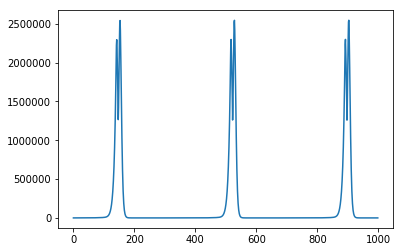

In [56]:
% matplotlib inline
t_diff=[]
for t in range(1,1000):
    t_diff.append(np.amax(sim.prices[-1-t-10:-1-t])-np.amin(sim.prices[-1-t-10:-1-t]))
df_t_diff = pd.DataFrame(t_diff[::-1])
print(df_t_diff.apply(lambda x: x.is_monotonic_decreasing)[0])
plt.plot(t_diff)

0.3979379584383436


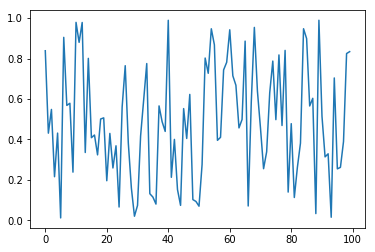

longueur période -14 hauteur pic 0.6782568771983198
longueur période -7 hauteur pic 0.7386165310275944
longueur période -5 hauteur pic 0.7272132314902526
longueur période 0 hauteur pic 1.0
longueur période 5 hauteur pic 0.7272132314902526
longueur période 7 hauteur pic 0.7386165310275944
longueur période 14 hauteur pic 0.6782568771983198


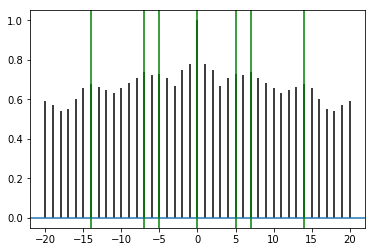

In [72]:
### Cas témoin: random data
random_data=[rd.random() for i in range(100)]
absciss = [i for i in range(100)]

print(statsmodels.stats.stattools.durbin_watson(random_data))
plt.plot(absciss, random_data)
plt.show()
lags, c, line, b = plt.acorr(random_data, maxlags=20)
peaks, peaks_properties=scipy.signal.find_peaks(c)
for i in peaks:
    print("longueur période", lags[i], "hauteur pic", c[i])
    plt.axvline(lags[i], color="green")
plt.show()

longueur période -375 hauteur pic 0.6667645431980048
longueur période 0 hauteur pic 1.0
longueur période 375 hauteur pic 0.6667645431980048


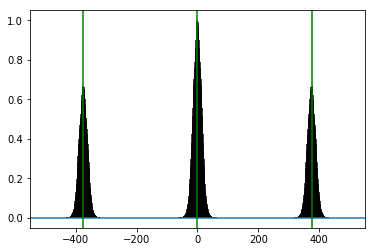

In [70]:
### Essai sur modèle 

lags, c, line, b = plt.acorr(t_diff, maxlags=500)
peaks, peaks_properties=scipy.signal.find_peaks(c)
for i in peaks:
    print("longueur période", lags[i], "hauteur pic", c[i])
    plt.axvline(lags[i], color="green")
plt.show()

<IPython.core.display.Javascript object>


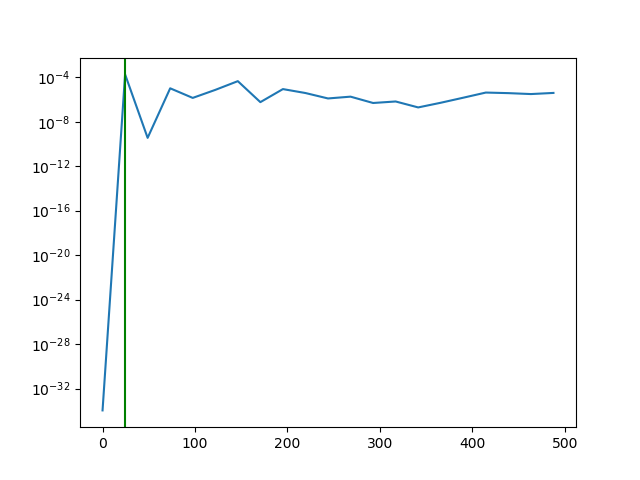

24.390243902439025

In [74]:
%matplotlib notebook
freq, dft = scipy.signal.periodogram(c, fs=1000)
plt.semilogy(freq, dft)
plt.axvline(freq[np.where(dft==max(dft))[0][0]], color="green")
plt.show()
np.where(dft==max(dft))[0][0]
freq[np.where(dft==max(dft))[0][0]]

In [58]:
alpha=0.3
alpha_p=0.01
w=0.1

beta=0.1
beta_p=0.05

b=1
q=0
pert = 0

values_p=np.logspace(-3,4,15)
values_g=[np.array([i]) for i in values_p]

p_init=values_p[10]
g_init=values_g[4]

def detect_periodicity(sim):
    """
    Function used to determine if prices oscillate or not.
    :param sim: Dynamics object
    :return: True in converges, False otherwise
    """  
    fact_norm=float(max(sim.prices[1:-1]))
    prices = [float(sim.prices[i])/fact_norm for i in range(1,len(sim.prices))]
    plt.plot(prices)
    freq, dft = scipy.signal.periodogram(prices)

    g_stat, pvalue = scipy.stats.power_divergence(f_obs=dft, lambda_=0)
    print(pvalue)
    #plt.plot(freq,dft)
    #return pvalue < 0.001

sim_args = simulations.variables_simulation(alpha, alpha_p, beta, beta_p, w, q, b, p_init, g_init, pert)
sim = simulations.simulation(**sim_args)
p_eq_0,g_eq_0=simulations.compute_equilibrium(sim)
prod = [sim.Q_demand[i, 1, 1] + sim.Q_demand[i, 1, 0] for i in range(len(sim.Q_demand))]
print("last prod", prod[-1])
print("last price", sim.prices[-1][0])

P_EQ [0.5]
G_EQ [2.]
last prod 0.040576251998313134
last price 246.44957351940062


<IPython.core.display.Javascript object>


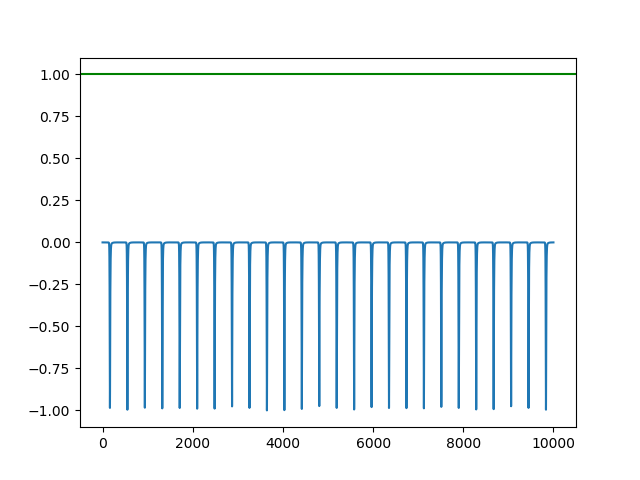

1.0


In [64]:
%matplotlib notebook

def detect_periodicity(sim):
    """
    Function used to determine if prices oscillate or not.
    :param sim: Dynamics object
    :return: True in converges, False otherwise
    """  
    fact_norm=float(max(sim.prices[1:-1]))
    prices = [-float(sim.prices[i])/fact_norm for i in range(1,len(sim.prices))]
    plt.plot(prices)
    freq, dft = scipy.signal.periodogram(prices)

    g_stat, pvalue = scipy.stats.power_divergence(f_obs=dft, lambda_=0)
    print(pvalue)
    #plt.plot(freq,dft)
    #return pvalue < 0.001

detect_periodicity(sim)
plt.axhline(1,color="green")

In [65]:
fact_norm=float(max(sim.prices[1:-1]))
peaks_minus, peaks_properties_minus=scipy.signal.find_peaks(-sim.prices.T[0][1:-1]/fact_norm)
peaks_plus, peaks_properties_plus=scipy.signal.find_peaks(sim.prices.T[0][1:-1]/fact_norm)

In [80]:

print(peaks_minus)
print(peaks_plus)

np.average(sim.prices.T[0][1:-1][peaks_plus])/np.average(sim.prices.T[0][1:-1][peaks_minus]) < 10e3

[  96  482  869 1256 1643 2030 2416 2803 3190 3577 3964 4350 4737 5124
 5510 5897 6284 6671 7057 7444 7831 8218 8604 8991 9378 9764]
[ 164  551  938 1324 1711 2098 2485 2872 3258 3645 4032 4419 4806 5192
 5579 5966 6352 6739 7126 7512 7899 8286 8673 9060 9446 9833]


False

<IPython.core.display.Javascript object>


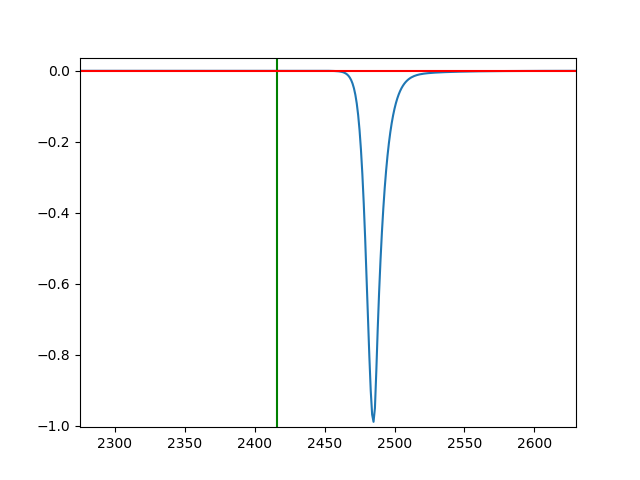

In [71]:
%matplotlib notebook
plt.plot((-sim.prices[1:-1])/max(sim.prices[1:-1]))
for pic in peaks_minus:
    plt.axvline(pic, color="green")
plt.axhline(0, color="red")

In [4]:
def rolling_diff(sim):
    """
    Function used for classifying the long-term behaviour of the prices in  a
    single simulation: rolling diff version.
    :param sim: Dynamics object
    :param threshold: float, threshold for the function's precision
    :return: Bool, for "prices converge" statement
    """
    t_diff=[]
    for t in range(1,10):
        t_diff.append(np.amax(sim.prices[-1-t-10:-1-t])-np.amin(sim.prices[-1-t-10:-1-t]))
    df_t_diff = pd.DataFrame(t_diff[::-1])
    plt.plot(t_diff[::-1])
    

<IPython.core.display.Javascript object>


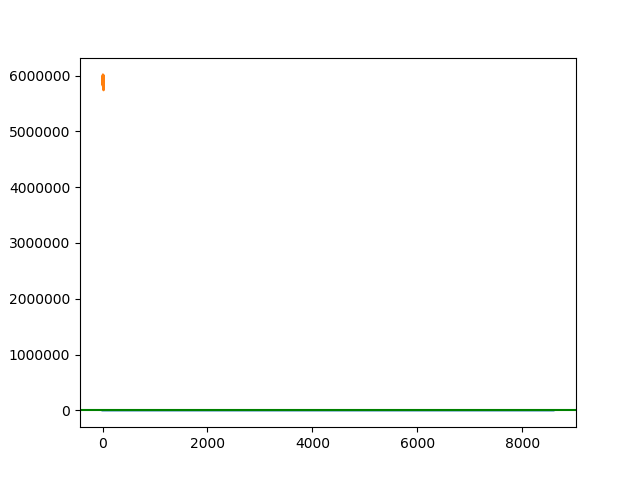

In [24]:
%matplotlib notebook
k=400
t_max=[max(sim.prices[j-k+1:j-1]) for j in range(k,len(sim.prices[1:-1]))]
plt.plot((t_max/max(t_max))[1000:])
plt.axhline(1,color="green")

<IPython.core.display.Javascript object>


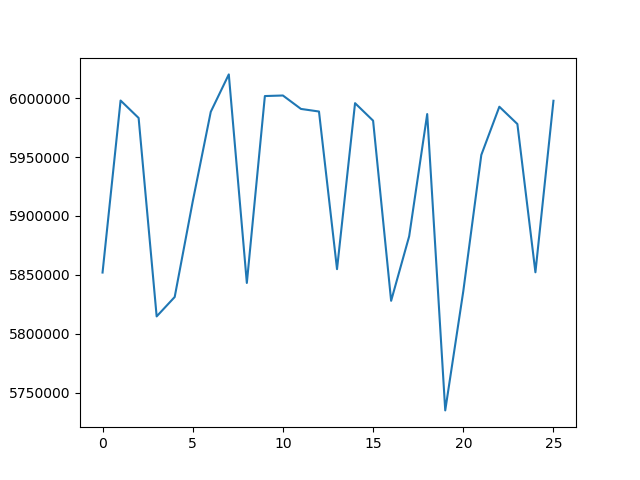

In [25]:
%matplotlib notebook

plt.plot(sim.prices[peaks])

In [87]:
random_data=[rd.random() for i in range(100)]
absciss = [i for i in range(100)]

fact_norm=float(max(random_data))
peaks_minus, peaks_properties_minus=scipy.signal.find_peaks([-i*(1/fact_norm) for i in random_data[1:-1]])
peaks_plus, peaks_properties_plus=scipy.signal.find_peaks([i*(1/fact_norm) for i in random_data[1:-1]])

np.average(sim.prices.T[0][1:-1][peaks_plus])/np.average(sim.prices.T[0][1:-1][peaks_minus]) < 10e3

True

0.8675101406638264


<IPython.core.display.Javascript object>


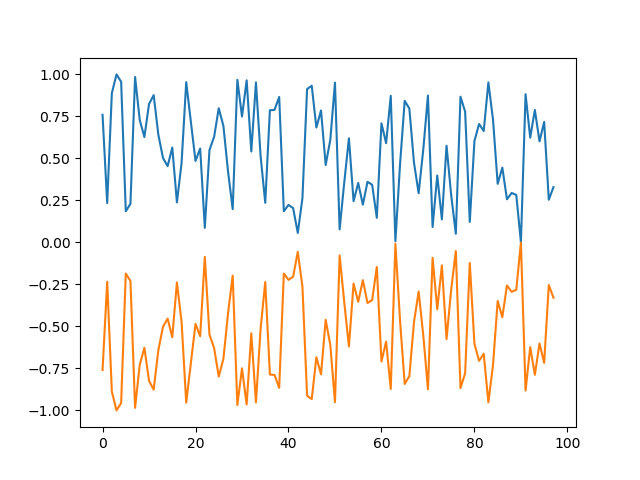

In [89]:
%matplotlib notebook
print(np.average(sim.prices.T[0][1:-1][peaks_plus])/np.average(sim.prices.T[0][1:-1][peaks_minus]))
plt.plot([i*(1/fact_norm) for i in random_data[1:-1]])
plt.plot([-i*(1/fact_norm) for i in random_data[1:-1]])

In [49]:
np.nan

nan